# fetch california housing

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = fetch_california_housing()

In [3]:
print(type(data))

<class 'sklearn.utils.Bunch'>


In [4]:
print(data.keys())

dict_keys(['data', 'target', 'DESCR', 'feature_names'])


In [5]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [8]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc        20640 non-null float64
HouseAge      20640 non-null float64
AveRooms      20640 non-null float64
AveBedrms     20640 non-null float64
Population    20640 non-null float64
AveOccup      20640 non-null float64
Latitude      20640 non-null float64
Longitude     20640 non-null float64
target        20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


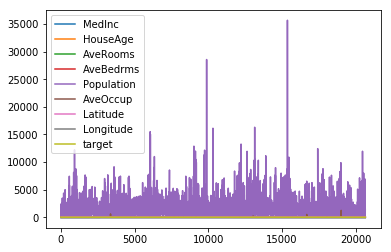

In [11]:
df.plot()

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils

In [13]:
class CaliforniaHousingModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(CaliforniaHousingModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.ReLU(),
            nn.Linear(16, output_size)
        )
        
    def forward(self, x):
        output = self.model(x)
        return output

In [14]:
X = torch.Tensor(data.data)
y = torch.Tensor(data.target)

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # train과 test를 8:2로 분할

In [16]:
model = CaliforniaHousingModel(8, 1)

In [17]:
n = 0
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([15.8272]) tensor(1.8420)


In [18]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
print(model)

CaliforniaHousingModel(
  (model): Sequential(
    (0): Linear(in_features=8, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


In [20]:
model = CaliforniaHousingModel(8, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

n_epochs = 10000 # 10000회 학습

avg_loss = 0 
for epoch in range(n_epochs):
    y = model(X_train)
    target = torch.unsqueeze(y_train, dim=1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        print('epoch {}th loss: {}'.format(epoch, loss.data))

epoch 0th loss: 104483.3515625
epoch 1000th loss: 0.9196478128433228
epoch 2000th loss: 0.7377620935440063
epoch 3000th loss: 0.6852000951766968
epoch 4000th loss: 0.6416032910346985
epoch 5000th loss: 0.6122538447380066
epoch 6000th loss: 0.5951101779937744
epoch 7000th loss: 0.5855283141136169
epoch 8000th loss: 0.5808238983154297
epoch 9000th loss: 0.5736932158470154


In [21]:
n = 99
y = model(X_train[n]).detach() # 더 이상 연산을 추적하지 않는다
print(y, y_train[n])

tensor([3.3963]) tensor(4.6640)


In [22]:
model = CaliforniaHousingModel(8, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
criterion = nn.MSELoss()

n_epochs = 10000 # 10000회 학습

list_training_loss = []
list_test_loss = []

for epoch in range(n_epochs):
    model.train()
    y = model(X_train)
    target = torch.unsqueeze(y_train, dim=1)
    loss = criterion(y, target).sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 1000 == 0:
        model.eval()
        y_pred = model(X_test).squeeze()
        test_loss = criterion(y_pred, y_test).sum()
        print('epoch {}th training loss: {} test loss: {}'.format(epoch, loss.data, test_loss.data))
        list_training_loss.append(loss.data)
        list_test_loss.append(test_loss.data)

epoch 0th training loss: 3640.787109375 test loss: 3471.168701171875
epoch 1000th training loss: 1.3158717155456543 test loss: 1.3373678922653198
epoch 2000th training loss: 0.8267773389816284 test loss: 0.8545752763748169
epoch 3000th training loss: 0.6029171347618103 test loss: 0.6211586594581604
epoch 4000th training loss: 0.5487076044082642 test loss: 0.5504624843597412
epoch 5000th training loss: 0.5355110764503479 test loss: 0.5394092202186584
epoch 6000th training loss: 0.5276991724967957 test loss: 0.5317166447639465
epoch 7000th training loss: 0.5238268375396729 test loss: 0.5284519195556641
epoch 8000th training loss: 0.5166707634925842 test loss: 0.5263319611549377
epoch 9000th training loss: 0.5221538543701172 test loss: 0.5297226309776306


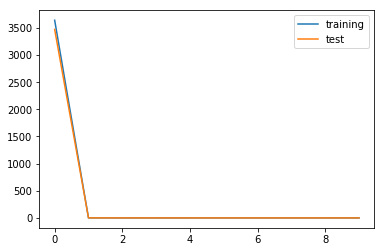

In [23]:
import matplotlib.pyplot as plt

plt.plot(list_training_loss, label='training')
plt.plot(list_test_loss, label='test')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

with torch.no_grad():
    y_pred = model(X_test)
    score = r2_score(y_test, y_pred)
    print(score)